In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

#### Importing the dataset into pandas

In [2]:
df=pd.read_csv('train.csv')
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Data Understanding and Visualizations 

We plot few of the important variables which provides the desciption of the house prises

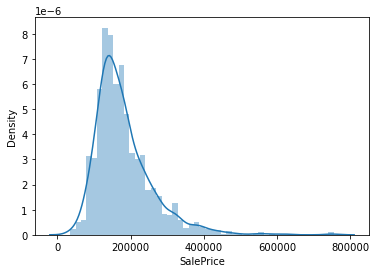

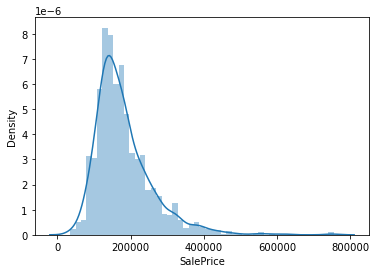

In [4]:
sns.distplot(df['SalePrice'])
plt.show()

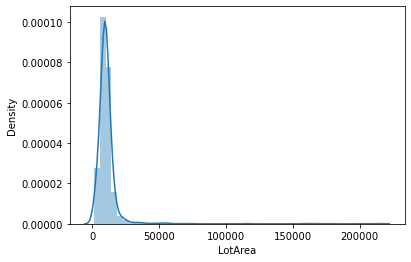

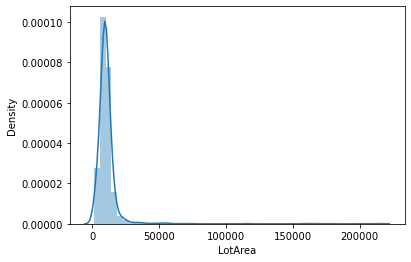

In [5]:
sns.distplot(df['LotArea'])
plt.show()

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

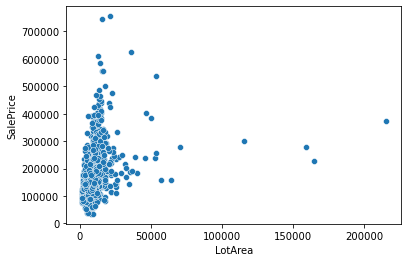

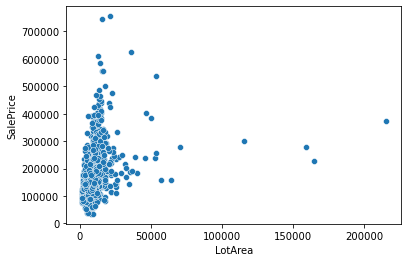

In [6]:
sns.scatterplot(x='LotArea',y='SalePrice',data=df)

<AxesSubplot:ylabel='SalePrice'>

<AxesSubplot:ylabel='SalePrice'>

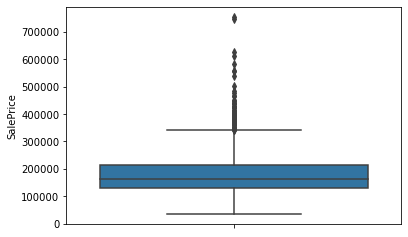

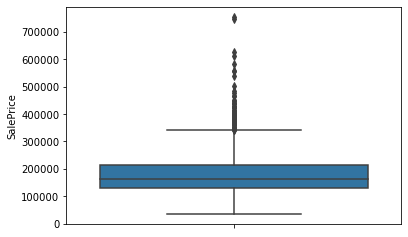

In [7]:
sns.boxplot(y=df['SalePrice'])

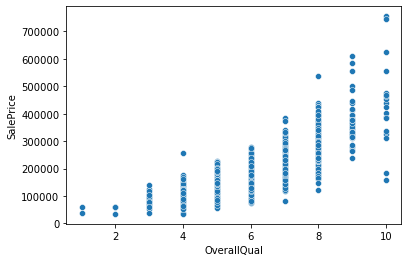

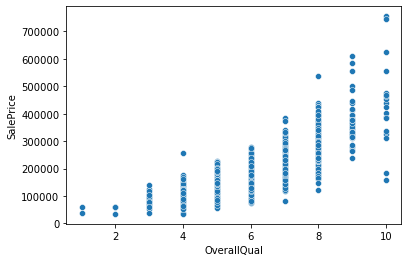

In [8]:
sns.scatterplot(x='OverallQual',y='SalePrice',data=df)
plt.show()

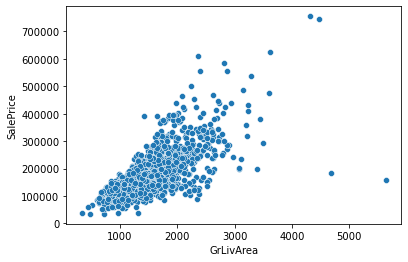

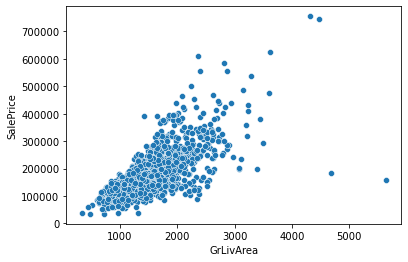

In [9]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df)
plt.show()

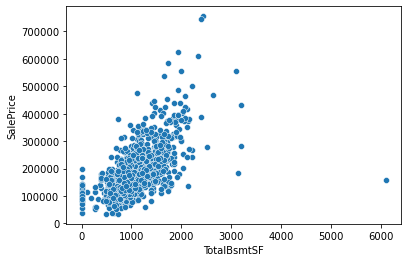

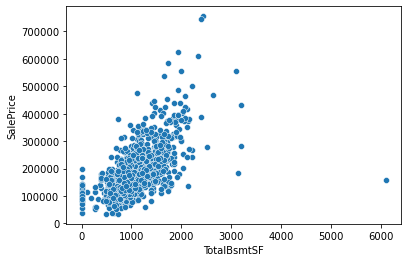

In [10]:
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=df)
plt.show()

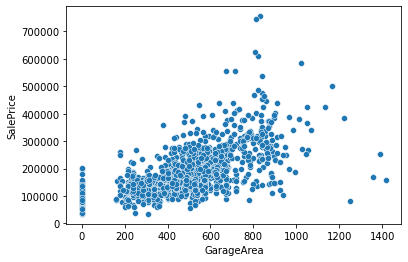

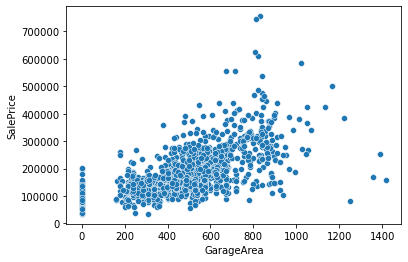

In [11]:
sns.scatterplot(x='GarageArea',y='SalePrice',data=df)
plt.show()

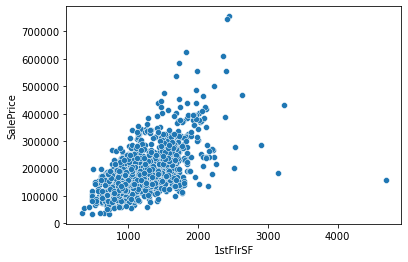

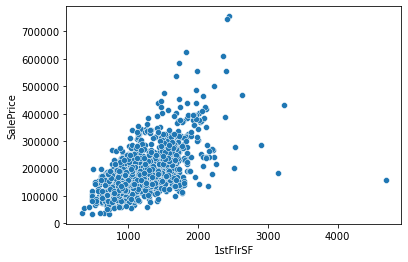

In [12]:
sns.scatterplot(x='1stFlrSF',y='SalePrice',data=df)
plt.show()

<AxesSubplot:>

<AxesSubplot:>

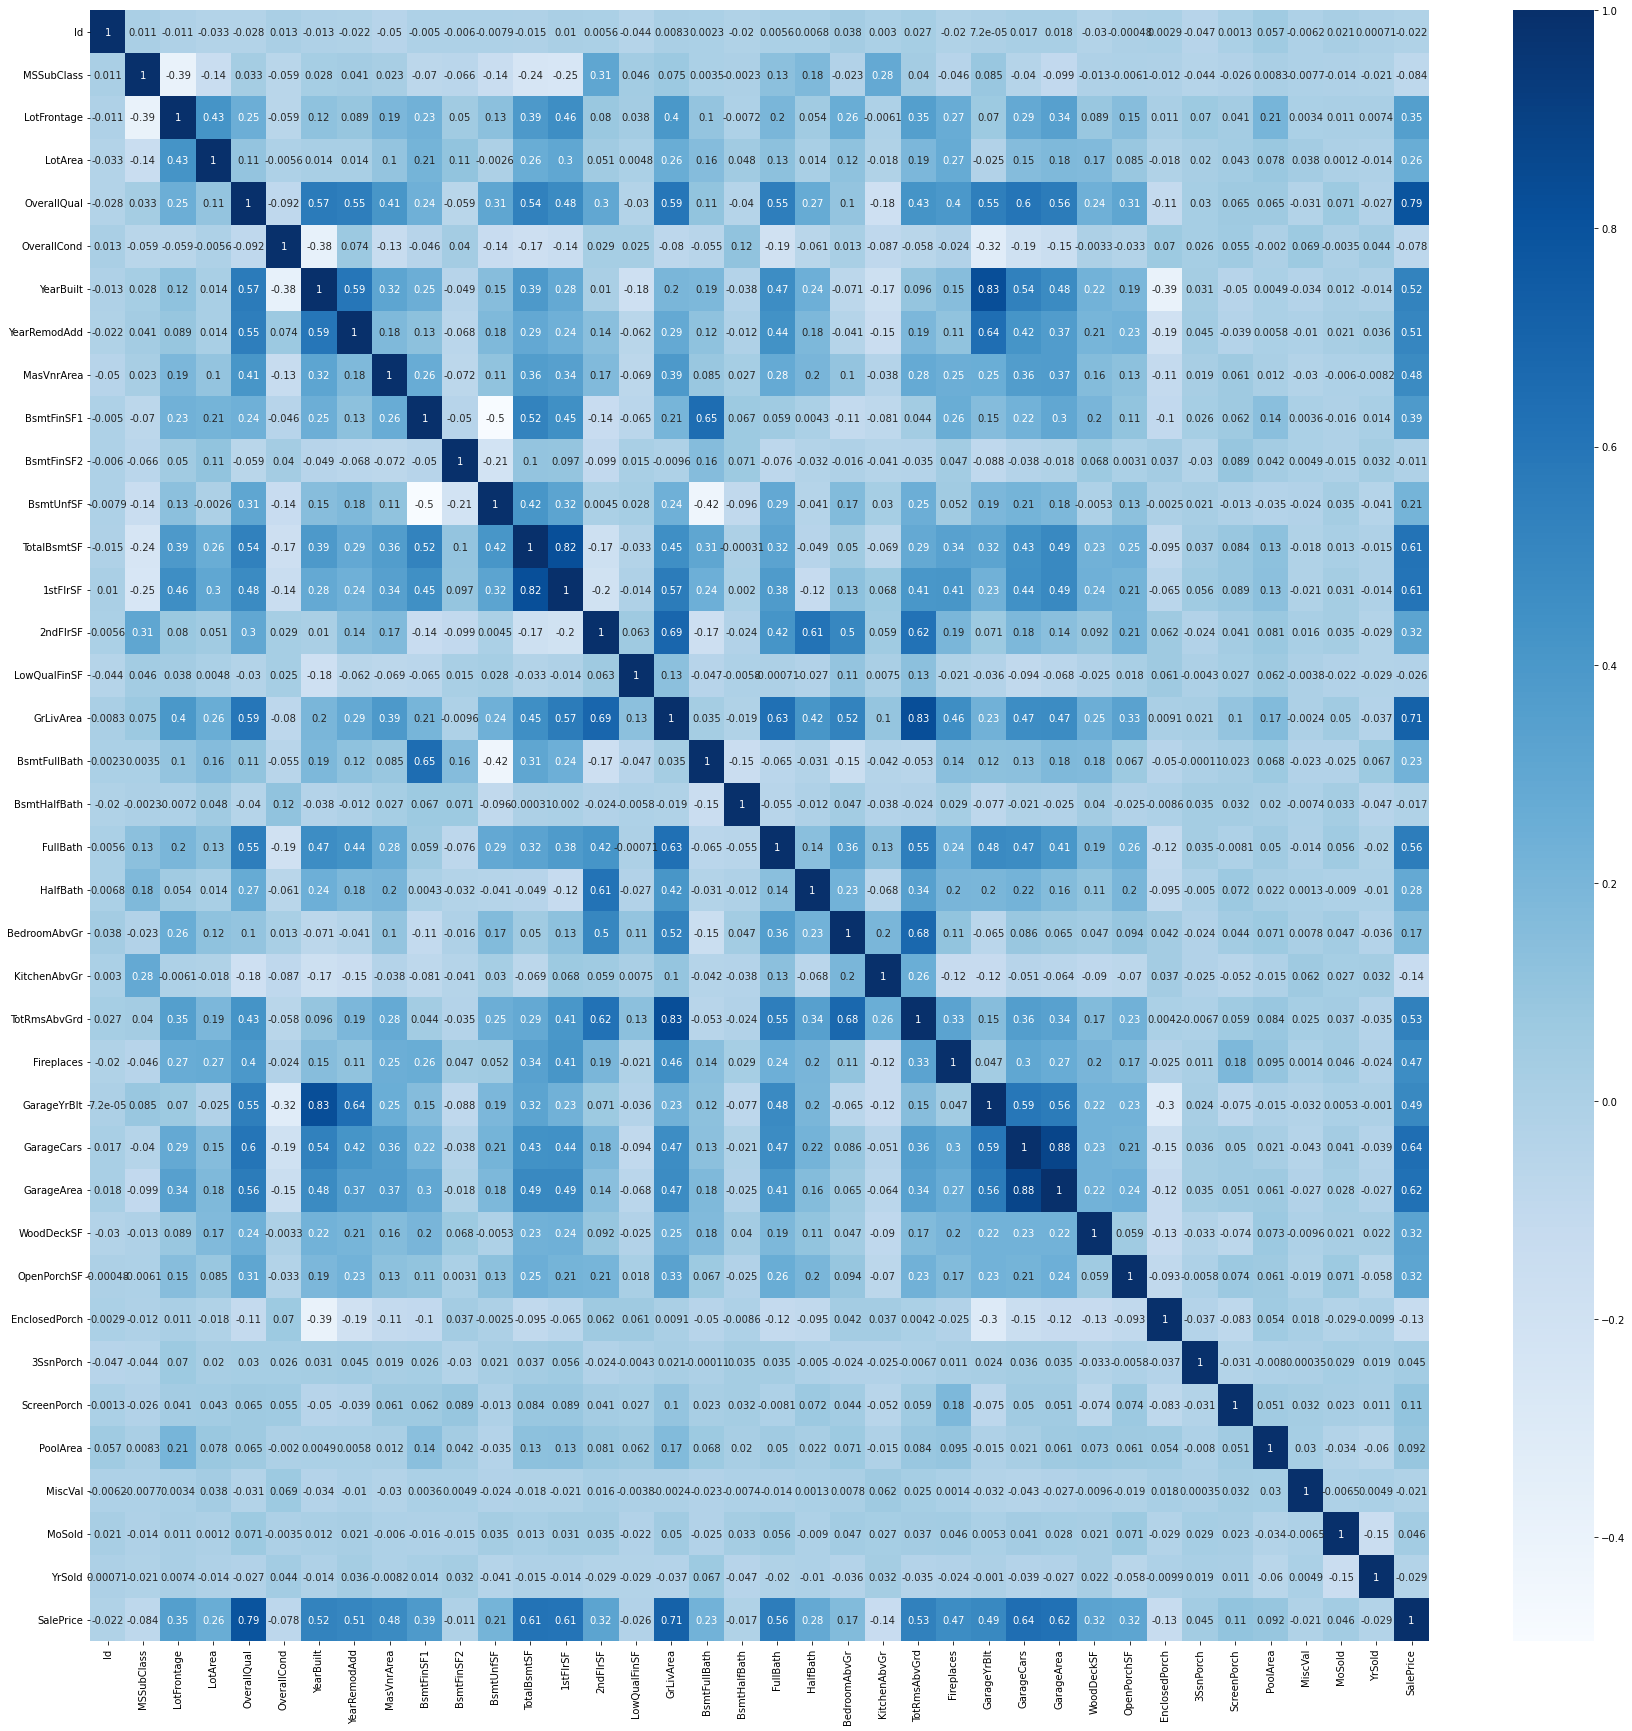

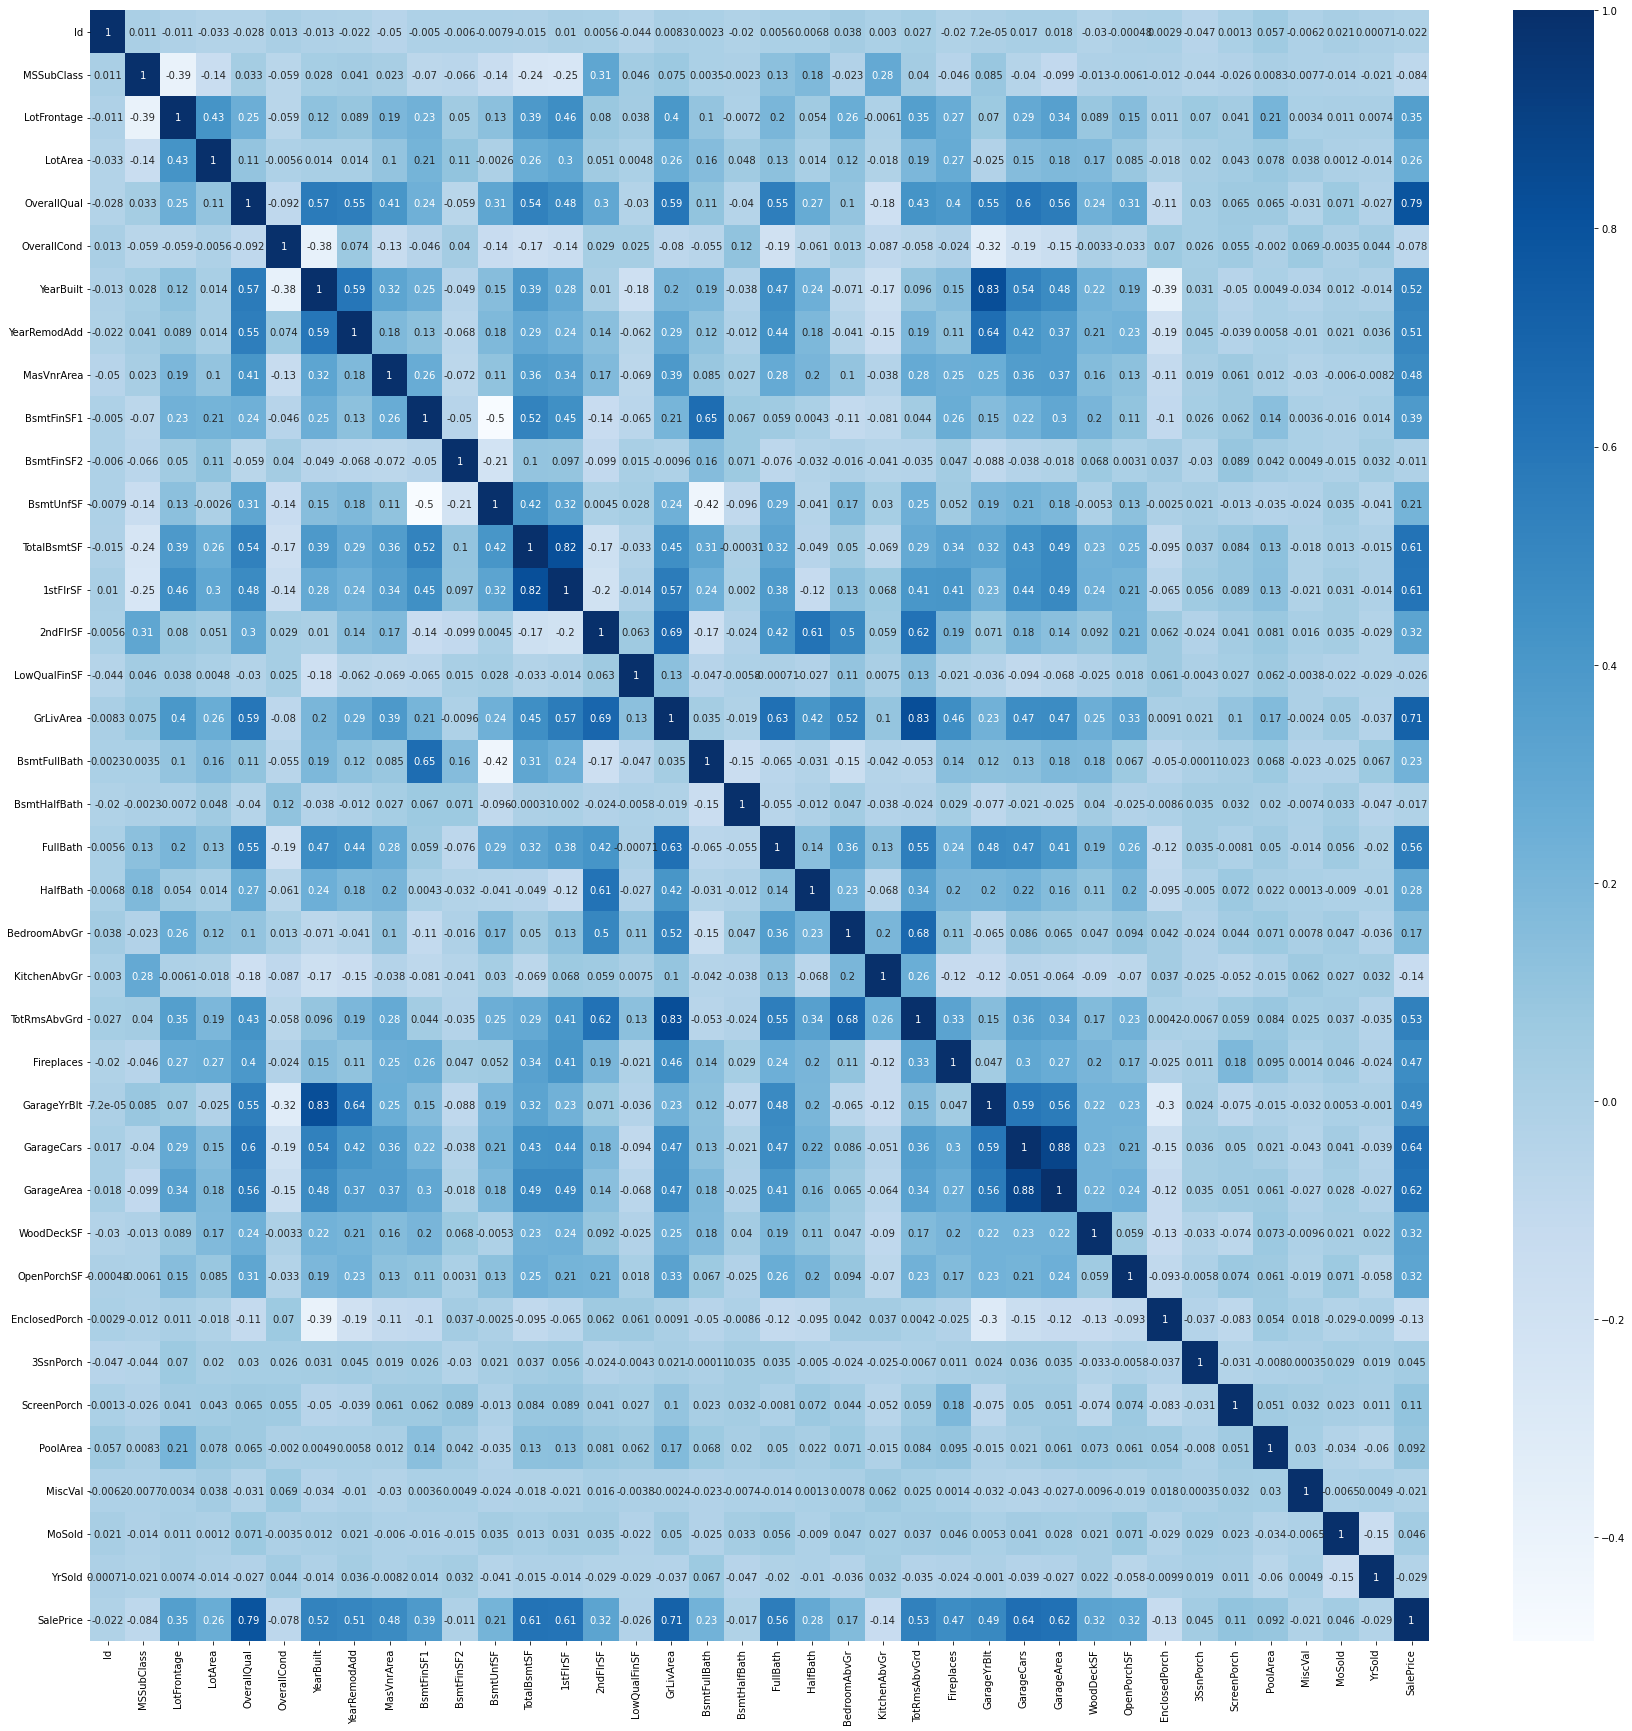

In [13]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

Below are the important conclusion drawn between the various predictor variables and dependent variable(house price)

1.Most of the property in the database have a saleprice less than 200000.
2.Lot area is not important factor predicting the sales price
3.The house prices increases with increase in overall quality of the house.
4.The sale prices of the house follows linear trend with the Ground living area, garage area, 1st floor area, basement area.
5.Sub class of the property dont play much role in determing the sales price.
6.1st floor area and basement area highly collinear to each other. Hence we remove the basement area from model building process.

#### Data Cleaning and manipulation 

Below are the approaches taken:

1. First we remove all the variables which are not not/less useful for predicting the house price. 
2. Second we replace the null values with some meaning full /readable data. For example value of NA in basement column can be replaced by 0(no basement is present).
3. Create dummies out of categorical variables.
4. Remove rows having null values for numerical variables as these data can't be assumed.

In [14]:
# Dropping the columns which are not relevant for model building
df=df.drop(['Id','GarageYrBlt','YearBuilt','YearRemodAdd','MoSold','YrSold','SaleType','SaleCondition','MiscVal','MSSubClass'],axis=1)

In [15]:
#Converting few of the numerical variables into ordered categorical variables as per the info given in key
df['CentralAir']=df['CentralAir'].map({'N':0,'Y':1})
df['OverallQual']=df['OverallQual'].map({10:'Very Excellent',9:'Excellent',8:'Very Good',7:'Good',6:'Above Average',5:'Average',4:'Below Average',3:'Fair',2:'Poor',1:'Very Poor'})
df['OverallCond']=df['OverallCond'].map({10:'Very Excellent',9:'Excellent',8:'Very Good',7:'Good',6:'Above Average',5:'Average',4:'Below Average',3:'Fair',2:'Poor',1:'Very Poor'})
#Filling nan values with either 0 or 'None' depending upon the type of variable
df['MasVnrArea']=df['MasVnrArea'].fillna(0)
nacolumnslist=['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
df[nacolumnslist]=df[nacolumnslist].fillna('None')

In [16]:
#Creating dummies for the categorical variables and append to existing dataframe
house_categorical = df.select_dtypes(include=['object'])
house_dummies=pd.get_dummies(house_categorical)
df=df.drop(list(house_categorical.columns),axis=1)
df=pd.concat([df,house_dummies],axis=1)
df.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,...,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,65.0,8450,196.0,706,0,150,856,1,856,854,...,0,0,0,0,1,0,1,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1,1262,0,...,0,0,0,0,1,0,1,0,0,0
2,68.0,11250,162.0,486,0,434,920,1,920,866,...,0,0,0,0,1,0,1,0,0,0
3,60.0,9550,0.0,216,0,540,756,1,961,756,...,0,0,0,0,1,0,1,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1,1145,1053,...,0,0,0,0,1,0,1,0,0,0


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,...,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,65.0,8450,196.0,706,0,150,856,1,856,854,...,0,0,0,0,1,0,1,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1,1262,0,...,0,0,0,0,1,0,1,0,0,0
2,68.0,11250,162.0,486,0,434,920,1,920,866,...,0,0,0,0,1,0,1,0,0,0
3,60.0,9550,0.0,216,0,540,756,1,961,756,...,0,0,0,0,1,0,1,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1,1145,1053,...,0,0,0,0,1,0,1,0,0,0


In [17]:
#Removing the rows having null values for the column LotFrontage
df=df[~df['LotFrontage'].isna()]

#### Building the linear regression Model 

In [18]:
# Splitting the dataframe into train and test data

df_train,df_test = train_test_split(df, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [19]:
# Applying min-max scaler to the train data and test data
df_train.info()
scaler = MinMaxScaler()
df_train[list(df_train.columns)] = scaler.fit_transform(df_train)
df_test[list(df_test.columns)] = scaler.transform(df_test)
df_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840 entries, 850 to 957
Columns: 297 entries, LotFrontage to MiscFeature_TenC
dtypes: float64(2), int64(27), uint8(268)
memory usage: 416.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 840 entries, 850 to 957
Columns: 297 entries, LotFrontage to MiscFeature_TenC
dtypes: float64(2), int64(27), uint8(268)
memory usage: 416.7 KB


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,...,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
850,0.051370,0.014653,0.106250,0.291593,0.0,0.080908,0.264504,1.0,0.183310,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
712,0.065068,0.015756,0.000000,0.339381,0.0,0.197346,0.383032,1.0,0.318830,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1175,0.219178,0.043834,0.210625,0.309735,0.0,0.420805,0.524953,1.0,0.640157,0.359806,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1284,0.099315,0.038973,0.000000,0.000000,0.0,0.344178,0.250780,1.0,0.486805,0.362228,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
385,0.075342,0.008797,0.010000,0.010619,0.0,0.527397,0.391765,1.0,0.333452,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,...,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
850,0.051370,0.014653,0.106250,0.291593,0.0,0.080908,0.264504,1.0,0.183310,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
712,0.065068,0.015756,0.000000,0.339381,0.0,0.197346,0.383032,1.0,0.318830,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1175,0.219178,0.043834,0.210625,0.309735,0.0,0.420805,0.524953,1.0,0.640157,0.359806,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1284,0.099315,0.038973,0.000000,0.000000,0.0,0.344178,0.250780,1.0,0.486805,0.362228,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
385,0.075342,0.008797,0.010000,0.010619,0.0,0.527397,0.391765,1.0,0.333452,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [20]:
#Getting the corresponding x_train,x_test, y_train and y_test data
y_train=df_train.pop('SalePrice')
x_train=df_train
y_test=df_test.pop('SalePrice')
x_test=df_test

In [21]:
#Initialize linear regression object and fit a line
lm = LinearRegression()
lm.fit(x_train, y_train)


LinearRegression()

LinearRegression()

In [22]:
print(lm.intercept_)
print(lm.coef_)

220738282720.43677
[ 2.53763816e-03  2.33877538e-01  8.24313608e-02 -1.71617564e+12
 -1.11931101e+12 -1.77388774e+12  2.43453942e+12 -4.00547973e-03
  2.72904750e+11  2.00980139e+11  5.56710118e+10 -4.22593590e+11
  1.26037598e-02  2.29492188e-02  2.61383057e-02  4.17175293e-02
  1.41448975e-02 -1.14677429e-01  6.19850159e-02  9.73510742e-02
  8.89587402e-03  3.82843018e-02  3.78723145e-02 -2.07824707e-02
  4.77943420e-02  1.02798462e-01  6.50024414e-03  9.01962280e+00
  3.41295872e+11  3.41295872e+11  3.41295872e+11  3.41295872e+11
  3.41295872e+11  1.86655301e+11  1.86655301e+11 -8.74622303e+10
 -8.74622303e+10 -8.74622303e+10  4.96548413e+10  4.96548413e+10
  4.96548413e+10  4.96548413e+10 -3.59436762e+11 -3.59436762e+11
 -3.59436762e+11 -3.59436762e+11  4.98539778e+10  4.09716387e+10
 -1.41184787e+11 -1.41184787e+11 -1.41184787e+11 -1.41184787e+11
 -1.41184787e+11  9.61239089e+10  9.61239089e+10  9.61239089e+10
 -7.75232822e+09 -7.75232822e+09 -7.75232822e+09 -7.75232822e+09
 -7.75

In [23]:
#Finding the r2 value for train and test data set
y_pred_train = lm.predict(x_train)
y_pred_test = lm.predict(x_test)


r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 for Train set is '+str(r2_train_lr))
r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 for Test set is '+str(r2_test_lr))
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE for Test set is '+str(mse_test_lr))
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE for Train set is '+str(mse_train_lr))

R2 for Train set is 0.8627853204485494
R2 for Test set is -2.1758393929832663e+22
MSE for Test set is 2.837558610376513e+20
MSE for Train set is 0.0018572990314016811
R2 for Train set is 0.8627853204485494
R2 for Test set is -2.1758393929832663e+22
MSE for Test set is 2.837558610376513e+20
MSE for Train set is 0.0018572990314016811


##### Conclusion drawn from linear regression model

1. It is clearly observed from R2 and MSE value on the test data set is modely is behaving very poorly and hence we need to find the optimum value of hyperparamater using ridge/lasso regression.

### Ridge 

We perform ridge regression on the data to find the optimum value of the hyperparameter alpha. We decide to run the analysis on alpha ranging from 0.0001 to 1000 and find out the best optimum value of hyperparamater using 5 fold cross validation technique.

In [24]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
#Initialize ridge regression object
ridge = Ridge()

# cross validation using 5 fold cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(x_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [25]:
# Print the most optimum value of hyperparamater
print(model_cv.best_params_)

{'alpha': 5.0}
{'alpha': 5.0}


In [26]:
# Fit a line using ridge regression using hyperparamter value of 5.0 and print the corresponding coefficients
ridge = Ridge(alpha=5)
ridge.fit(x_train, y_train)
print(ridge.coef_)

[ 1.01748921e-02  2.21476405e-02  1.99744060e-02  5.61201911e-02
  1.28030444e-02  1.06182369e-02  5.31838805e-02  5.38009828e-03
  5.58066712e-02  5.80231684e-02 -3.72676403e-03  6.31432611e-02
  1.03275851e-02  3.46233113e-03  4.26372731e-02  2.56217836e-02
  7.42530264e-03 -1.99591039e-02  3.95420774e-02  4.11499892e-02
  3.67892757e-02  2.60145357e-02  1.24453022e-02 -5.18689966e-03
 -7.72621511e-03  1.31279728e-02  1.55931559e-02  3.06528266e-02
 -2.23323067e-02  1.03336430e-02 -3.14778651e-03  8.12241933e-03
  7.02403090e-03 -1.01709325e-02  1.01709325e-02  2.75571959e-03
  2.53733928e-03 -5.29305886e-03 -1.28801214e-02  7.61905950e-03
  1.54821221e-02 -1.02210602e-02 -1.22233315e-02  1.66147459e-02
 -1.04532211e-02  6.06180669e-03  0.00000000e+00  0.00000000e+00
  2.21152729e-03  1.88562618e-02 -1.02603971e-02 -9.92098357e-03
 -8.86408361e-04 -5.46685887e-03  6.66604183e-03 -1.19918295e-03
 -7.49727431e-03 -2.28299150e-03  1.89855446e-03 -7.35056839e-03
 -4.21819953e-03 -8.28423

In [27]:
# Get the test/train predicted values from the ridge regression model
y_pred_test = ridge.predict(x_test)
y_pred_train = ridge.predict(x_train)

In [28]:
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 for Train set is '+str(r2_train_lr))
r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 for Test set is '+str(r2_test_lr))
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE for Test set is '+str(mse_test_lr))
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE for Train set is '+str(mse_train_lr))

R2 for Train set is 0.9260433134443661
R2 for Test set is 0.7563140357989149
MSE for Test set is 0.003177960690373481
MSE for Train set is 0.0010010567583182799
R2 for Train set is 0.9260433134443661
R2 for Test set is 0.7563140357989149
MSE for Test set is 0.003177960690373481
MSE for Train set is 0.0010010567583182799


##### Conclusion drawn from ridge regression model

1. We can observe that the R2 value has greatly improved on the test data if we use the model obtained by ridge regression. Same improvement is observed on the train data

### Lasso 

We perform lasso regression on the data to find the optimum value of the hyperparameter alpha. We decide to run the analysis on alpha ranging from 0.0001 to 1000 and find out the best optimum value of hyperparamater using 5 fold cross validation technique.

In [29]:
#Initialize lasso regression object
lasso = Lasso()

# cross validation using 5 fold cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [30]:
# Print the most optimum value of hyperparamater
print(model_cv.best_params_)

{'alpha': 0.0001}
{'alpha': 0.0001}


In [31]:
# Fit a line using lasso regression using hyperparamter value of 0.0001 and print the corresponding coefficients
lasso = Lasso(alpha=0.0001)
        
lasso.fit(x_train, y_train) 

Lasso(alpha=0.0001)

Lasso(alpha=0.0001)

In [32]:
# Get the test/train predicted values from the lasso regression model
y_pred_test = lasso.predict(x_test)
y_pred_train = lasso.predict(x_train)

In [33]:
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 for Train set is '+str(r2_train_lr))
r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 for Test set is '+str(r2_test_lr))
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE for Test set is '+str(mse_test_lr))
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE for Train set is '+str(mse_train_lr))

R2 for Train set is 0.931432897137886
R2 for Test set is 0.7263591779300005
MSE for Test set is 0.0035686083877294983
MSE for Train set is 0.0009281048802367557
R2 for Train set is 0.931432897137886
R2 for Test set is 0.7263591779300005
MSE for Test set is 0.0035686083877294983
MSE for Train set is 0.0009281048802367557


##### Conclusion drawn from lasso regression model

1. We can observe that the R2 value has greatly improved on the test data if we use the model obtained by lasso regression. Same improvement is observed on the train data<br>
2. The R2 value obtained on the test data is slightly less for the lasso compared to ridge. Hence we can conclude that ridge regression is better able to explain the variance in the test data. Hence we will take the coefficients obtained from ridge regression to explain which predictor variables impact the housing prices.

In [34]:
#Print the coefficients obtained by linear, ridge ,lasso regression model
coeffi = pd.DataFrame(index=x_train.columns)
coeffi['Linear'] = lm.coef_
coeffi['Ridge'] = ridge.coef_
coeffi['Lasso'] = lasso.coef_

In [35]:
# Print the coefficients obtained by Ridge regression in decending order
pd.set_option('display.max_rows', None)
coeffi.sort_values(axis=0,by=['Lasso'],ascending=False)

,Linear,Ridge,Lasso
GrLivArea,-4.225936e+11,0.063143,0.135444
OverallQual_Very Excellent,-7.927751e+10,0.053052,0.094145
PoolArea,9.019623e+00,0.030653,0.083811
TotalBsmtSF,2.434539e+12,0.053184,0.077375
2ndFlrSF,2.009801e+11,0.058023,0.071473
RoofMatl_WdShngl,6.849162e+10,0.041805,0.070331
1stFlrSF,2.729048e+11,0.055807,0.068652
LotArea,2.338775e-01,0.022148,0.064469
BsmtFinSF1,-1.716176e+12,0.056120,0.064025
Neighborhood_StoneBr,-7.752328e+09,0.043812,0.054872


,Linear,Ridge,Lasso
GrLivArea,-4.225936e+11,0.063143,0.135444
OverallQual_Very Excellent,-7.927751e+10,0.053052,0.094145
PoolArea,9.019623e+00,0.030653,0.083811
TotalBsmtSF,2.434539e+12,0.053184,0.077375
2ndFlrSF,2.009801e+11,0.058023,0.071473
RoofMatl_WdShngl,6.849162e+10,0.041805,0.070331
1stFlrSF,2.729048e+11,0.055807,0.068652
LotArea,2.338775e-01,0.022148,0.064469
BsmtFinSF1,-1.716176e+12,0.056120,0.064025
Neighborhood_StoneBr,-7.752328e+09,0.043812,0.054872


#### Final Conclusions 

Below are the conclusion obtained from the model building process and analyzing the coefficients:-<br>

1. Optimal value of hyperparameter using Ridge regression is 5.
2. Optimal value of hyperparameter using Lasso regression is 0.0001.

Most important factors impacting the housing prices are as follows:-<br><br>
1.The overall area of the house in square feet impacts the prices of the house extent to great extent. The area includes Ground floor area, basement area, second floor area, basement area.<br>
2. The overall condition and quality of the house also impact the prices. If both the qulaity and condition is excellent the house price will be more compared to a property whose qulaity and condition is average.<br>
3. House having a pool will have higher price than house having no pool. Also the higher the quality and area of the pool, higher will be the final price of the house.<br>
4. More the number of full bathrooms, more will be price of the house.<br>
5. More the number of available fireplaces more will be the price of the house.<br>
6. The number of cars which can be parked in the garage also impacts the price. Greater is this number greater will be the housing prices.<br>
7. Neighbourhood of the house also place a important factor in determining the house prices. Houses in areas such as Stone Brook,Northridge,Somerset generally have higher prices than houses located in neihbourhood such as Oldtown,Mitchell ,Edwards.<br>
8. Houses with roof made up on wooden shingles have higher prices than houses having composite shingle.<br>
9. Houses located in Hillside,level type of surface have higher prices than ones located on banked and depressed surface.<br>

## 